## Credit Card Fraud Detection - Task2

### Load transaction data

In [1]:
import pandas as pd
import numpy as np

# Read transaction data from log file
transaction_data = pd.read_csv("data/task2_data.csv", 
                               names = ["DateTime", "CardID", "TerminalID", "Amount", "Class"], 
                               parse_dates=['DateTime'],
                               dtype =  { u'CardID': str, u'TerminalID': str, u'Amount': int, u'Class': str})
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class
0,2018-06-10 00:36:00,002575146,112579,348,0
1,2018-06-10 00:36:00,116554167,006557,1615,0
2,2018-06-10 00:36:00,116277239,149937,1641,0
3,2018-06-10 00:36:00,116158492,119980,4623,1
4,2018-06-10 00:36:00,137376727,007375,13330,0


### Exploratory Data Analysis

In [2]:
transaction_data.dtypes

DateTime      datetime64[ns]
CardID                object
TerminalID            object
Amount                 int32
Class                 object
dtype: object

In [3]:
transaction_data.shape

(14421, 5)

In [4]:
transaction_data.isnull().values.any()

False

Transaction dataset:
Number of fraudulents = 778
Number of not fraudulents = 13643
Fraudulent ratio = 0.0539
Fraudulent percentege = 5.39%


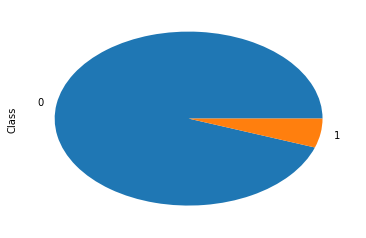

In [7]:
import matplotlib.pyplot as plt

number_of_observations = transaction_data.shape[0]
number_of_fraudulents = transaction_data[transaction_data["Class"] == '1'].shape[0]
number_of_not_fraudulents = number_of_observations - number_of_fraudulents
fraudulent_ratio = number_of_fraudulents / float(number_of_observations)
print("Transaction dataset:")
print('Number of fraudulents = {0}'.format(number_of_fraudulents))
print('Number of not fraudulents = {0}'.format(number_of_not_fraudulents))
print('Fraudulent ratio = {0:.4f}'.format(fraudulent_ratio)) 
print('Fraudulent percentege = {0:.2f}%'.format(fraudulent_ratio * 100)) 

number_of_is_attributed = transaction_data["Class"].value_counts()
number_of_is_attributed.plot(kind='pie')
plt.show()

In [8]:
normal_transaction_data = transaction_data[transaction_data["Class"] == '0']
normal_transaction_data["Amount"].describe()

count    13643.000000
mean      2655.545921
std       3977.050107
min          0.000000
25%        440.500000
50%        884.000000
75%       3542.000000
max      29867.000000
Name: Amount, dtype: float64

In [9]:
fraud_transaction_data = transaction_data[transaction_data["Class"] == '1']
fraud_transaction_data["Amount"].describe()

count      778.000000
mean      4895.326478
std       5871.867342
min         12.000000
25%        951.000000
50%       1000.000000
75%       4989.750000
max      29992.000000
Name: Amount, dtype: float64

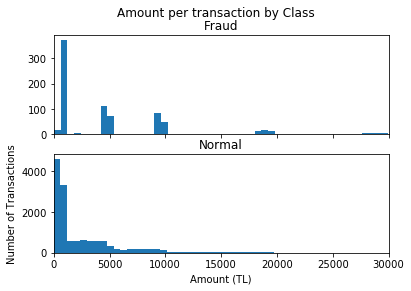

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by Class')

bins = 50

ax1.hist(fraud_transaction_data.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal_transaction_data.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount (TL)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 30000))
plt.show();

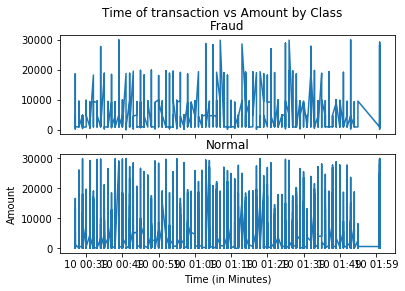

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by Class')

ax1.plot(fraud_transaction_data.DateTime, fraud_transaction_data.Amount)
ax1.set_title('Fraud')

ax2.plot(normal_transaction_data.DateTime, normal_transaction_data.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Minutes)')
plt.ylabel('Amount')
plt.show()

### Feature Extraction

In [12]:
# Parse Datetime column 

# Get year
transaction_data['year'] = transaction_data['DateTime'].dt.year.astype('uint16')

# Get month
transaction_data['month'] = transaction_data['DateTime'].dt.month.astype('uint8')

# Get day
transaction_data['day'] = transaction_data['DateTime'].dt.day.astype('uint8')

# Get hour
transaction_data['hour'] = transaction_data['DateTime'].dt.hour.astype('uint8')

# Get minute
transaction_data['minute'] = transaction_data['DateTime'].dt.minute.astype('uint8')

transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute
0,2018-06-10 00:36:00,002575146,112579,348,0,2018,6,10,0,36
1,2018-06-10 00:36:00,116554167,006557,1615,0,2018,6,10,0,36
2,2018-06-10 00:36:00,116277239,149937,1641,0,2018,6,10,0,36
3,2018-06-10 00:36:00,116158492,119980,4623,1,2018,6,10,0,36
4,2018-06-10 00:36:00,137376727,007375,13330,0,2018,6,10,0,36


In [13]:
# Parse CardID column

# Get kind feature
# Debit = 0
# Credit = 1
transaction_data['CardKind'] = transaction_data['CardID'].str[0]

# Get limit feature
# Debit - max daily transaction (1000 TL) = 0
# Credit - monthly limit (5000 TL) = 1
# Credit - monthly limit (10000 TL) = 2
# Credit - monthly limit (20000 TL) = 3
# Credit - monthly limit (30000 TL) = 4
transaction_data['CardLimit'] = transaction_data['CardID'].str[1]

# Get home location feature
# International = 00
# State/Province = 01 ... 80
transaction_data['CardHomeLocation'] = transaction_data['CardID'].str.slice(2,4)

# Get customer no
transaction_data['CustomerNo'] = transaction_data['CardID'].str.slice(4,9)

transaction_data.head(10)

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo
0,2018-06-10 00:36:00,002575146,112579,348,0,2018,6,10,0,36,0,0,25,75146
1,2018-06-10 00:36:00,116554167,006557,1615,0,2018,6,10,0,36,1,1,65,54167
2,2018-06-10 00:36:00,116277239,149937,1641,0,2018,6,10,0,36,1,1,62,77239
3,2018-06-10 00:36:00,116158492,119980,4623,1,2018,6,10,0,36,1,1,61,58492
4,2018-06-10 00:36:00,137376727,007375,13330,0,2018,6,10,0,36,1,3,73,76727
5,2018-06-10 00:36:00,006267164,006297,964,1,2018,6,10,0,36,0,0,62,67164
6,2018-06-10 00:36:00,005282146,005237,476,0,2018,6,10,0,36,0,0,52,82146
7,2018-06-10 00:36:00,001178096,132436,28,0,2018,6,10,0,36,0,0,11,78096
8,2018-06-10 00:36:00,006339567,146321,852,0,2018,6,10,0,36,0,0,63,39567
9,2018-06-10 00:36:00,006167465,146108,53,0,2018,6,10,0,36,0,0,61,67465


In [14]:
# Parse TerminalID column

# Get kind feature
# ATM = 0
# POS = 1
transaction_data['TerminalKind'] = transaction_data['TerminalID'].str[0]

# Get merchant category feature
# ATM - Undefined = 0
# POS - Business type = 1 ... 5
transaction_data['TerminalMerchant'] = transaction_data['TerminalID'].str[1]

# Get location feature
# International = 00
# State/Province = 01 ... 80
# Internet = 99
transaction_data['TerminalLocation'] = transaction_data['TerminalID'].str.slice(2,4)

transaction_data.head(10)

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation
0,2018-06-10 00:36:00,002575146,112579,348,0,2018,6,10,0,36,0,0,25,75146,1,1,25
1,2018-06-10 00:36:00,116554167,006557,1615,0,2018,6,10,0,36,1,1,65,54167,0,0,65
2,2018-06-10 00:36:00,116277239,149937,1641,0,2018,6,10,0,36,1,1,62,77239,1,4,99
3,2018-06-10 00:36:00,116158492,119980,4623,1,2018,6,10,0,36,1,1,61,58492,1,1,99
4,2018-06-10 00:36:00,137376727,007375,13330,0,2018,6,10,0,36,1,3,73,76727,0,0,73
5,2018-06-10 00:36:00,006267164,006297,964,1,2018,6,10,0,36,0,0,62,67164,0,0,62
6,2018-06-10 00:36:00,005282146,005237,476,0,2018,6,10,0,36,0,0,52,82146,0,0,52
7,2018-06-10 00:36:00,001178096,132436,28,0,2018,6,10,0,36,0,0,11,78096,1,3,24
8,2018-06-10 00:36:00,006339567,146321,852,0,2018,6,10,0,36,0,0,63,39567,1,4,63
9,2018-06-10 00:36:00,006167465,146108,53,0,2018,6,10,0,36,0,0,61,67465,1,4,61


In [15]:
transaction_data['SameLocation'] = transaction_data.apply(lambda x : 1 if x["CardHomeLocation"] == x["TerminalLocation"] else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation
0,2018-06-10 00:36:00,002575146,112579,348,0,2018,6,10,0,36,0,0,25,75146,1,1,25,1
1,2018-06-10 00:36:00,116554167,006557,1615,0,2018,6,10,0,36,1,1,65,54167,0,0,65,1
2,2018-06-10 00:36:00,116277239,149937,1641,0,2018,6,10,0,36,1,1,62,77239,1,4,99,0
3,2018-06-10 00:36:00,116158492,119980,4623,1,2018,6,10,0,36,1,1,61,58492,1,1,99,0
4,2018-06-10 00:36:00,137376727,007375,13330,0,2018,6,10,0,36,1,3,73,76727,0,0,73,1


In [16]:
transaction_data["InternationalTransaction"] = transaction_data.apply(lambda x : 1 if x["TerminalLocation"] == "00" else 0, axis=1)
transaction_data["OnlineTransaction"] = transaction_data.apply(lambda x : 1 if x["TerminalLocation"] == "99" else 0, axis=1)
transaction_data["LocalTransaction"] = transaction_data.apply(lambda x : 1 if x["InternationalTransaction"] == 0 and x["OnlineTransaction"] == 0 else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction
0,2018-06-10 00:36:00,002575146,112579,348,0,2018,6,10,0,36,...,0,25,75146,1,1,25,1,0,0,1
1,2018-06-10 00:36:00,116554167,006557,1615,0,2018,6,10,0,36,...,1,65,54167,0,0,65,1,0,0,1
2,2018-06-10 00:36:00,116277239,149937,1641,0,2018,6,10,0,36,...,1,62,77239,1,4,99,0,0,1,0
3,2018-06-10 00:36:00,116158492,119980,4623,1,2018,6,10,0,36,...,1,61,58492,1,1,99,0,0,1,0
4,2018-06-10 00:36:00,137376727,007375,13330,0,2018,6,10,0,36,...,3,73,76727,0,0,73,1,0,0,1


In [17]:
credit_card_transaction_data = transaction_data[transaction_data["CardKind"] == "1"]
credit_card_transaction_data = credit_card_transaction_data.drop(["CardID", "TerminalID"], axis=1)
print(credit_card_transaction_data.shape)
credit_card_transaction_data.head()

(7236, 19)


,DateTime,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction
1,2018-06-10 00:36:00,1615,0,2018,6,10,0,36,1,1,65,54167,0,0,65,1,0,0,1
2,2018-06-10 00:36:00,1641,0,2018,6,10,0,36,1,1,62,77239,1,4,99,0,0,1,0
3,2018-06-10 00:36:00,4623,1,2018,6,10,0,36,1,1,61,58492,1,1,99,0,0,1,0
4,2018-06-10 00:36:00,13330,0,2018,6,10,0,36,1,3,73,76727,0,0,73,1,0,0,1
11,2018-06-10 00:36:00,4354,0,2018,6,10,0,36,1,1,63,14681,1,2,63,1,0,0,1


In [18]:
credit_card_transaction_data.to_csv('data/task3_data.csv', sep=',', index=False)